In [1]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [6]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.info()
df.describe()
df.isnull().sum()
df=df.dropna()
df=df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [21]:
#calculate Age from Year_ Birth
df['AGE']=2024-df['Year_Birth']


#Total accepted campaigns
channels=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df['Total_Accepted_Campaigns']=df[channels].sum(axis=1)


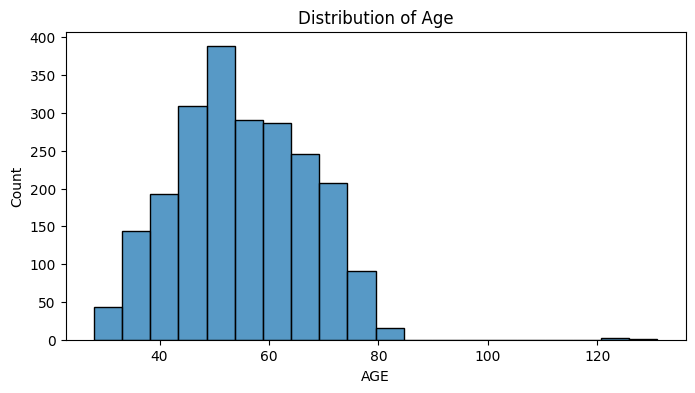

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['AGE'], bins=20)
plt.title('Distribution of Age')
plt.show()

In [27]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue= df[product_cols].sum()
print(product_revenue)

MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64


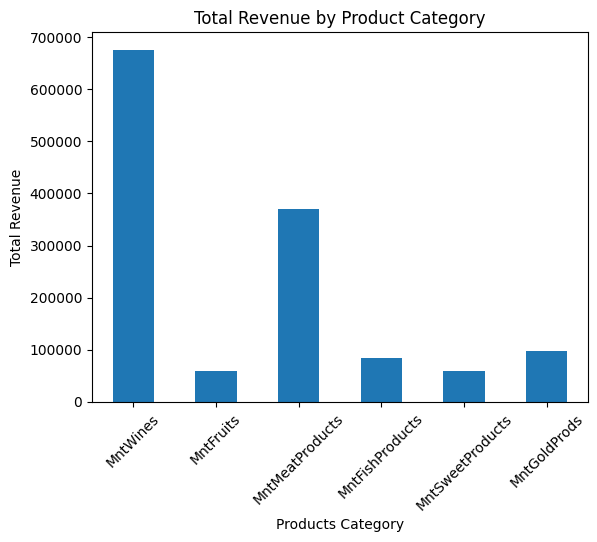

In [28]:
import matplotlib.pyplot as plt

product_revenue.plot(kind='bar')
plt.title("Total Revenue by Product Category")
plt.xlabel("Products Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [30]:
percent_revenue=100* product_revenue/ product_revenue.sum()
print(percent_revenue)

MntWines            50.255969
MntFruits            4.341479
MntMeatProducts     27.508272
MntFishProducts      6.199829
MntSweetProducts     4.452311
MntGoldProds         7.242141
dtype: float64


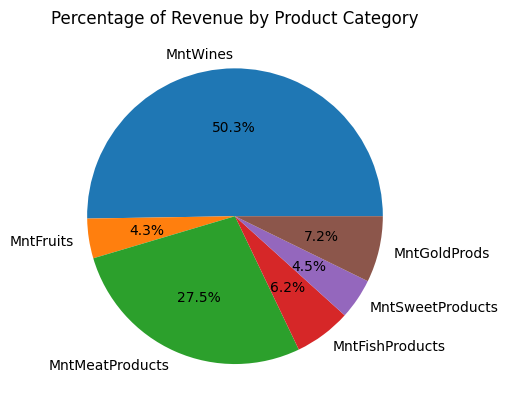

In [37]:
import matplotlib.pyplot as plt

percent_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Revenue by Product Category")
plt.show()

In [43]:
channels= ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['TotalAccepted'] = df [channels].sum(axis=1)
df['Responder']=df['TotalAccepted']>0 #True if accepted at least one campaign

In [45]:
responders=df[df['Responder']]
non_responders= df[~df['Responder']]

avg_age_responders=responders['AGE'].mean()
avg_income_responders=non_responders['Income'].mean()

avg_age_non_responders=non_responders['AGE'].mean()
avg_income_non_responders=non_responders['Income'].mean()

print(f"Responders-Avg Age: {avg_age_responders:.2f}, Avg Income: {avg_income_responders:.2f}")
print(f"Non-Responders-Avg Age: {avg_age_non_responders:.2f}, Avg Income: {avg_income_non_responders:.2f}")

Responders-Avg Age: 55.82, Avg Income: 48676.84
Non-Responders-Avg Age: 54.94, Avg Income: 48676.84


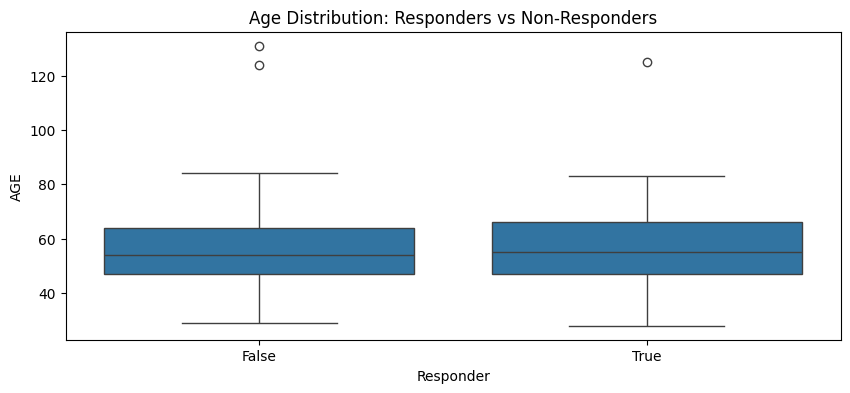

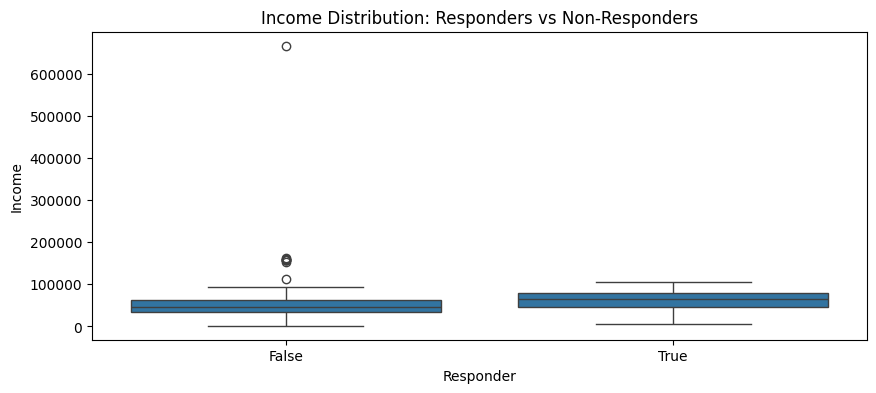

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(x='Responder',y='AGE',data=df)
plt.title('Age Distribution: Responders vs Non-Responders')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x= 'Responder',y='Income',data=df)
plt.title('Income Distribution: Responders vs Non-Responders')
plt.show()

In [53]:
channels=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
totals=df[channels].sum()
print(totals)

AcceptedCmp1    142
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    162
dtype: int64


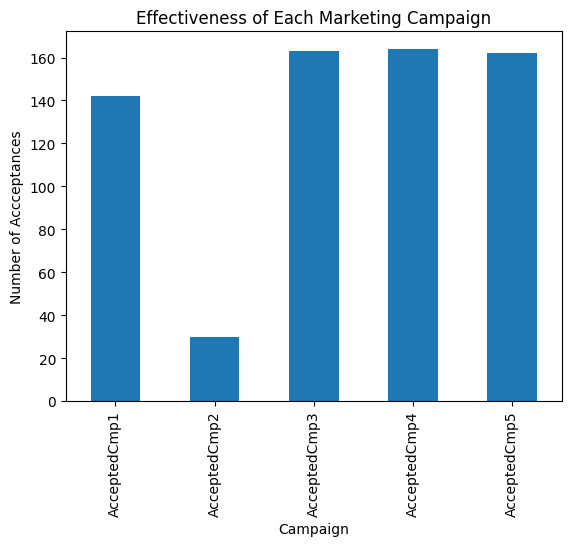

In [54]:
import matplotlib.pyplot as plt

totals.plot(kind='bar')
plt.title("Effectiveness of Each Marketing Campaign")
plt.xlabel("Campaign")
plt.ylabel("Number of Accceptances")
plt.show()

In [55]:
percent=100*totals/len(df)
print(percent)

AcceptedCmp1    6.407942
AcceptedCmp2    1.353791
AcceptedCmp3    7.355596
AcceptedCmp4    7.400722
AcceptedCmp5    7.310469
dtype: float64


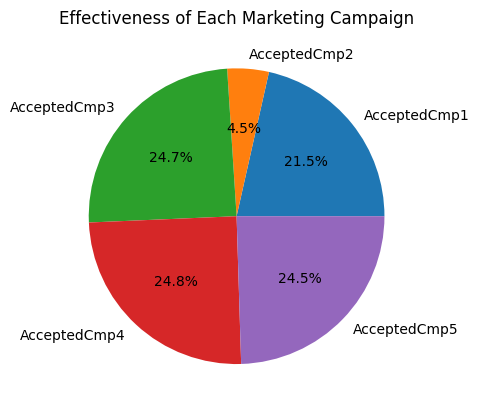

In [56]:
import matplotlib.pyplot as plt

percent.plot(kind='pie', autopct='%1.1f%%')
plt.title("Effectiveness of Each Marketing Campaign")
plt.show()